In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# to display all columns
pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.simplefilter(action='ignore', category= FutureWarning)


In [2]:
train=pd.read_csv('C:/pypy/train_qWM28Yl.csv')
train.head()

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   
3   ID00004       0.900277        0.11             0.432692           C4   
4   ID00005       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type     max_torque  \
0                4990     1       A    M1       CNG   60Nm@3500rpm   
1               27003     1       A    M1       CNG   60Nm@3500rpm   
2                4076     1       A    M1       CNG   60Nm@3500rpm   
3               21622     1      C1    M2    Petrol  113Nm@4400rpm   
4               34738     2       A    M3    Petrol   91Nm@4250rpm   

          max_power         engine_type  airbags is_esc  \
0  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
1  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
2  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
3  88.50bhp@6000rpm  1.2 L K12N Dualjet        2    Yes   
4  67.06bhp@5500rpm             1.0 SCe        2     No   

  is_adjustable_steering is_tpms is_parking_sensors is_parking_camera  \
0                     No      No                Yes                No   
1                     No      No                Yes                No   
2                     No      No                Yes                No   
3                    Yes      No                Yes               Yes   
4                     No      No                 No               Yes   

  rear_brakes_type  displacement  cylinder transmission_type  gear_box  \
0             Drum           796         3            Manual         5   
1             Drum           796         3            Manual         5   
2             Drum           796         3            Manual         5   
3             Drum          1197         4         Automatic         5   
4             Drum           999         3         Automatic         5   

  steering_type  turning_radius  length  width  height  gross_weight  \
0         Power             4.6    3445   1515    1475          1185   
1         Power             4.6    3445   1515    1475          1185   
2         Power             4.6    3445   1515    1475          1185   
3      Electric             4.8    3995   1735    1515          1335   
4      Electric             5.0    3731   1579    1490          1155   

  is_front_fog_lights is_rear_window_wiper is_rear_window_washer  \
0                  No                   No                    No   
1                  No                   No                    No   
2                  No                   No                    No   
3                 Yes                   No                    No   
4                  No                   No                    No   

  is_rear_window_defogger is_brake_assist is_power_door_locks  \
0                      No              No                  No   
1                      No              No                  No   
2                      No              No                  No   
3                     Yes             Yes                 Yes   
4                      No              No                 Yes   

  is_central_locking is_power_steering is_driver_seat_height_adjustable  \
0                 No               Yes                               No   
1                 No               Yes                               No   
2                 No               Yes                               No   
3                Yes               Yes                              Yes   
4                Yes               Yes                               No   

  is_day_night_rear_view_mirror is_ecw is_speed_alert  ncap_rating  is_claim  
0                            No     No            Yes            0         0  
1                            No     No     

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

<AxesSubplot:>

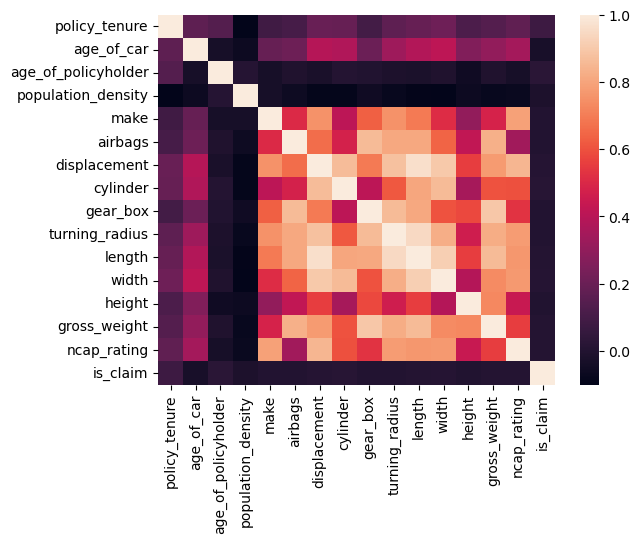

In [4]:
sns.heatmap(train.corr())

In [5]:
nan_cols= [col for col in train.columns if train[col].isnull().sum()>1]
print(len(nan_cols))
nan_cols

0


[]

In [6]:
numerical_cols=[col for col in train.columns if train[col].dtypes !='O']
print('Number of numerical features=', len(numerical_cols))

Number of numerical features= 16


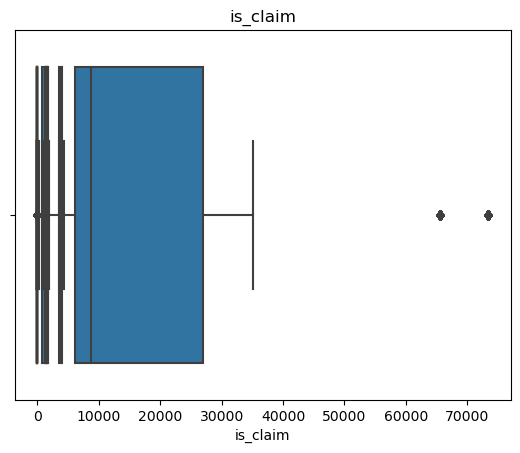

In [7]:
for x in numerical_cols:
    sns.boxplot(train[x])
    plt.title(x)

In [8]:
categorical_col=[col for col in train.columns if col not in numerical_cols]
categorical_col

['policy_id',
 'area_cluster',
 'segment',
 'model',
 'fuel_type',
 'max_torque',
 'max_power',
 'engine_type',
 'is_esc',
 'is_adjustable_steering',
 'is_tpms',
 'is_parking_sensors',
 'is_parking_camera',
 'rear_brakes_type',
 'transmission_type',
 'steering_type',
 'is_front_fog_lights',
 'is_rear_window_wiper',
 'is_rear_window_washer',
 'is_rear_window_defogger',
 'is_brake_assist',
 'is_power_door_locks',
 'is_central_locking',
 'is_power_steering',
 'is_driver_seat_height_adjustable',
 'is_day_night_rear_view_mirror',
 'is_ecw',
 'is_speed_alert']

In [9]:
for col in categorical_col:
    print('The feature name is {} and the number of categories are {}'.format(col,len(train[col].unique())))

The feature name is policy_id and the number of categories are 58592
The feature name is area_cluster and the number of categories are 22
The feature name is segment and the number of categories are 6
The feature name is model and the number of categories are 11
The feature name is fuel_type and the number of categories are 3
The feature name is max_torque and the number of categories are 9
The feature name is max_power and the number of categories are 9
The feature name is engine_type and the number of categories are 11
The feature name is is_esc and the number of categories are 2
The feature name is is_adjustable_steering and the number of categories are 2
The feature name is is_tpms and the number of categories are 2
The feature name is is_parking_sensors and the number of categories are 2
The feature name is is_parking_camera and the number of categories are 2
The feature name is rear_brakes_type and the number of categories are 2
The feature name is transmission_type and the numbe

In [10]:
#Note that the features with 2 categories are the features with 'Yes' or 'No' 
#we'll map the features

#dict1={'Yes':1, 'No':0}
for feature in categorical_col:
    if len(train[feature].unique())==2:
        train[feature]=pd.get_dummies(train[feature],drop_first=True)

In [11]:
train

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0       ID00001       0.515874        0.05             0.644231           C1   
1       ID00002       0.672619        0.02             0.375000           C2   
2       ID00003       0.841110        0.02             0.384615           C3   
3       ID00004       0.900277        0.11             0.432692           C4   
4       ID00005       0.596403        0.11             0.634615           C5   
...         ...            ...         ...                  ...          ...   
58587   ID58588       0.355089        0.13             0.644231           C8   
58588   ID58589       1.199642        0.02             0.519231          C14   
58589   ID58590       1.162273        0.05             0.451923           C5   
58590   ID58591       1.236307        0.14             0.557692           C8   
58591   ID58592       0.124429        0.02             0.442308           C8   

       population_density  make segment model fuel_type     max_torque  \
0                    4990     1       A    M1       CNG   60Nm@3500rpm   
1                   27003     1       A    M1       CNG   60Nm@3500rpm   
2                    4076     1       A    M1       CNG   60Nm@3500rpm   
3                   21622     1      C1    M2    Petrol  113Nm@4400rpm   
4                   34738     2       A    M3    Petrol   91Nm@4250rpm   
...                   ...   ...     ...   ...       ...            ...   
58587                8794     2       A    M3    Petrol   91Nm@4250rpm   
58588                7788     1       A    M1       CNG   60Nm@3500rpm   
58589               34738     1       A    M1       CNG   60Nm@3500rpm   
58590                8794     1      B2    M6    Petrol  113Nm@4400rpm   
58591                8794     3      C2    M4    Diesel  250Nm@2750rpm   

               max_power         engine_type  airbags  is_esc  \
0       40.36bhp@6000rpm   F8D Petrol Engine        2       0   
1       40.36bhp@6000rpm   F8D Petrol Engine        2       0   
2       40.36bhp@6000rpm   F8D Petrol Engine        2       0   
3       88.50bhp@6000rpm  1.2 L K12N Dualjet        2       1   
4       67.06bhp@5500rpm             1.0 SCe        2       0   
...                  ...                 ...      ...     ...   
58587   67.06bhp@5500rpm             1.0 SCe        2       0   
58588   40.36bhp@6000rpm   F8D Petrol Engine        2       0   
58589   40.36bhp@6000rpm   F8D Petrol Engine        2       0   
58590   88.50bhp@6000rpm   K Series Dual jet        2       0   
58591  113.45bhp@4000rpm       1.5 L U2 CRDi        6       1   

       is_adjustable_steering  is_tpms  is_parking_sensors  is_parking_camera  \
0                           0        0                   1                  0   
1                           0        0                   1                  0   
2                           0        0                   1                  0   
3                           1        0                   1                  1   
4                           0        0                   0                  1   
...                       ...      ...                 ...                ...   
58587                       0        0                   0                  1   
58588                       0        0                   1                  0   
58589                       0        0                   1                  0   
58590                       1        0                   1                  0   
58591                       1        1                   1                  1   

       rear_brakes_type  displacement  cylinder  transmission_type  gear_box  \
0                     1           796         3                  1         5   
1                     1           796         3                  1         5   
2                     1           796         3                  1         5   
3                     1          1197         4                  0         5   
4 

In [12]:
# for Max_torque feature find the value in Nm/rpm

train['max_torque(Nm)']=train['max_torque'].apply(lambda x:x.split('N')[0]).astype('float')
train['max_torque(@)']=train['max_torque'].apply(lambda x:x.split('@')[1])
train['max_torque(rpm)']=train['max_torque(@)'].apply(lambda x:x.split('r')[0]).astype('float')

train['max_torque']=train['max_torque(Nm)']/train['max_torque(rpm)']

In [13]:
train.head()

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   
3   ID00004       0.900277        0.11             0.432692           C4   
4   ID00005       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type  max_torque  \
0                4990     1       A    M1       CNG    0.017143   
1               27003     1       A    M1       CNG    0.017143   
2                4076     1       A    M1       CNG    0.017143   
3               21622     1      C1    M2    Petrol    0.025682   
4               34738     2       A    M3    Petrol    0.021412   

          max_power         engine_type  airbags  is_esc  \
0  40.36bhp@6000rpm   F8D Petrol Engine        2       0   
1  40.36bhp@6000rpm   F8D Petrol Engine        2       0   
2  40.36bhp@6000rpm   F8D Petrol Engine        2       0   
3  88.50bhp@6000rpm  1.2 L K12N Dualjet        2       1   
4  67.06bhp@5500rpm             1.0 SCe        2       0   

   is_adjustable_steering  is_tpms  is_parking_sensors  is_parking_camera  \
0                       0        0                   1                  0   
1                       0        0                   1                  0   
2                       0        0                   1                  0   
3                       1        0                   1                  1   
4                       0        0                   0                  1   

   rear_brakes_type  displacement  cylinder  transmission_type  gear_box  \
0                 1           796         3                  1         5   
1                 1           796         3                  1         5   
2                 1           796         3                  1         5   
3                 1          1197         4                  0         5   
4                 1           999         3                  0         5   

  steering_type  turning_radius  length  width  height  gross_weight  \
0         Power             4.6    3445   1515    1475          1185   
1         Power             4.6    3445   1515    1475          1185   
2         Power             4.6    3445   1515    1475          1185   
3      Electric             4.8    3995   1735    1515          1335   
4      Electric             5.0    3731   1579    1490          1155   

   is_front_fog_lights  is_rear_window_wiper  is_rear_window_washer  \
0                    0                     0                      0   
1                    0                     0                      0   
2                    0                     0                      0   
3                    1                     0                      0   
4                    0                     0                      0   

   is_rear_window_defogger  is_brake_assist  is_power_door_locks  \
0                        0                0                    0   
1                        0                0                    0   
2                        0                0                    0   
3                        1                1                    1   
4                        0                0                    1   

   is_central_locking  is_power_steering  is_driver_seat_height_adjustable  \
0                   0                  1                                 0   
1                   0                  1                                 0   
2                   0                  1                                 0   
3                   1                  1                                 1   
4                   1                  1                                 0   

   is_day_night_rear_view_mirror  is_ecw  is_speed_alert  ncap_rating  \
0                              0       0          

In [14]:
# for Max_power feature find the value in bhp/rpm

train['max_power(bhp)']=train['max_power'].apply(lambda x:x.split('b')[0]).astype('float')
train['max_power(@)']=train['max_power'].apply(lambda x:x.split('@')[1])
train['max_power(rpm)']=train['max_power(@)'].apply(lambda x:x.split('r')[0]).astype('float')

train['max_power']=train['max_power(bhp)']/train['max_power(rpm)']

In [15]:
train.head()

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   
3   ID00004       0.900277        0.11             0.432692           C4   
4   ID00005       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type  max_torque  max_power  \
0                4990     1       A    M1       CNG    0.017143   0.006727   
1               27003     1       A    M1       CNG    0.017143   0.006727   
2                4076     1       A    M1       CNG    0.017143   0.006727   
3               21622     1      C1    M2    Petrol    0.025682   0.014750   
4               34738     2       A    M3    Petrol    0.021412   0.012193   

          engine_type  airbags  is_esc  is_adjustable_steering  is_tpms  \
0   F8D Petrol Engine        2       0                       0        0   
1   F8D Petrol Engine        2       0                       0        0   
2   F8D Petrol Engine        2       0                       0        0   
3  1.2 L K12N Dualjet        2       1                       1        0   
4             1.0 SCe        2       0                       0        0   

   is_parking_sensors  is_parking_camera  rear_brakes_type  displacement  \
0                   1                  0                 1           796   
1                   1                  0                 1           796   
2                   1                  0                 1           796   
3                   1                  1                 1          1197   
4                   0                  1                 1           999   

   cylinder  transmission_type  gear_box steering_type  turning_radius  \
0         3                  1         5         Power             4.6   
1         3                  1         5         Power             4.6   
2         3                  1         5         Power             4.6   
3         4                  0         5      Electric             4.8   
4         3                  0         5      Electric             5.0   

   length  width  height  gross_weight  is_front_fog_lights  \
0    3445   1515    1475          1185                    0   
1    3445   1515    1475          1185                    0   
2    3445   1515    1475          1185                    0   
3    3995   1735    1515          1335                    1   
4    3731   1579    1490          1155                    0   

   is_rear_window_wiper  is_rear_window_washer  is_rear_window_defogger  \
0                     0                      0                        0   
1                     0                      0                        0   
2                     0                      0                        0   
3                     0                      0                        1   
4                     0                      0                        0   

   is_brake_assist  is_power_door_locks  is_central_locking  \
0                0                    0                   0   
1                0                    0                   0   
2                0                    0                   0   
3                1                    1                   1   
4                0                    1                   1   

   is_power_steering  is_driver_seat_height_adjustable  \
0                  1                                 0   
1                  1                                 0   
2                  1                                 0   
3                  1                                 1   
4                  1                                 0   

   is_day_night_rear_view_mirror  is_ecw  is_speed_alert  ncap_rating  \
0                              0       0               1            0   
1                  

In [16]:
train.drop(['max_torque(Nm)','max_torque(@)','max_torque(rpm)','max_power(bhp)','max_power(@)','max_power(rpm)'],axis=1,inplace=True)
train.head()

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   
3   ID00004       0.900277        0.11             0.432692           C4   
4   ID00005       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type  max_torque  max_power  \
0                4990     1       A    M1       CNG    0.017143   0.006727   
1               27003     1       A    M1       CNG    0.017143   0.006727   
2                4076     1       A    M1       CNG    0.017143   0.006727   
3               21622     1      C1    M2    Petrol    0.025682   0.014750   
4               34738     2       A    M3    Petrol    0.021412   0.012193   

          engine_type  airbags  is_esc  is_adjustable_steering  is_tpms  \
0   F8D Petrol Engine        2       0                       0        0   
1   F8D Petrol Engine        2       0                       0        0   
2   F8D Petrol Engine        2       0                       0        0   
3  1.2 L K12N Dualjet        2       1                       1        0   
4             1.0 SCe        2       0                       0        0   

   is_parking_sensors  is_parking_camera  rear_brakes_type  displacement  \
0                   1                  0                 1           796   
1                   1                  0                 1           796   
2                   1                  0                 1           796   
3                   1                  1                 1          1197   
4                   0                  1                 1           999   

   cylinder  transmission_type  gear_box steering_type  turning_radius  \
0         3                  1         5         Power             4.6   
1         3                  1         5         Power             4.6   
2         3                  1         5         Power             4.6   
3         4                  0         5      Electric             4.8   
4         3                  0         5      Electric             5.0   

   length  width  height  gross_weight  is_front_fog_lights  \
0    3445   1515    1475          1185                    0   
1    3445   1515    1475          1185                    0   
2    3445   1515    1475          1185                    0   
3    3995   1735    1515          1335                    1   
4    3731   1579    1490          1155                    0   

   is_rear_window_wiper  is_rear_window_washer  is_rear_window_defogger  \
0                     0                      0                        0   
1                     0                      0                        0   
2                     0                      0                        0   
3                     0                      0                        1   
4                     0                      0                        0   

   is_brake_assist  is_power_door_locks  is_central_locking  \
0                0                    0                   0   
1                0                    0                   0   
2                0                    0                   0   
3                1                    1                   1   
4                0                    1                   1   

   is_power_steering  is_driver_seat_height_adjustable  \
0                  1                                 0   
1                  1                                 0   
2                  1                                 0   
3                  1                                 1   
4                  1                                 0   

   is_day_night_rear_view_mirror  is_ecw  is_speed_alert  ncap_rating  \
0                              0       0               1            0   
1                  

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  float64
 11  max_power                         58592 non-null  float64
 12  engi

In [18]:
object_feature=[x for x in train.columns if train[x].dtypes=='O']
object_feature

['policy_id',
 'area_cluster',
 'segment',
 'model',
 'fuel_type',
 'engine_type',
 'steering_type']

In [19]:
for col in object_feature:
    x=np.sort(train[col].unique())
    dict1={k:v for v, k in enumerate(x,1)}
    train[col]=train[col].map(dict1)

In [20]:
train[object_feature].head()

policy_id  area_cluster  segment  model  fuel_type  engine_type  \
0          1             1        1      1          1            7   
1          2            12        1      1          1            7   
2          3            16        1      1          1            7   
3          4            17        4      4          3            3   
4          5            18        1      5          3            1   

   steering_type  
0              3  
1              3  
2              3  
3              1  
4              1

In [21]:
train.head()

policy_id  policy_tenure  age_of_car  age_of_policyholder  area_cluster  \
0          1       0.515874        0.05             0.644231             1   
1          2       0.672619        0.02             0.375000            12   
2          3       0.841110        0.02             0.384615            16   
3          4       0.900277        0.11             0.432692            17   
4          5       0.596403        0.11             0.634615            18   

   population_density  make  segment  model  fuel_type  max_torque  max_power  \
0                4990     1        1      1          1    0.017143   0.006727   
1               27003     1        1      1          1    0.017143   0.006727   
2                4076     1        1      1          1    0.017143   0.006727   
3               21622     1        4      4          3    0.025682   0.014750   
4               34738     2        1      5          3    0.021412   0.012193   

   engine_type  airbags  is_esc  is_adjustable_steering  is_tpms  \
0            7        2       0                       0        0   
1            7        2       0                       0        0   
2            7        2       0                       0        0   
3            3        2       1                       1        0   
4            1        2       0                       0        0   

   is_parking_sensors  is_parking_camera  rear_brakes_type  displacement  \
0                   1                  0                 1           796   
1                   1                  0                 1           796   
2                   1                  0                 1           796   
3                   1                  1                 1          1197   
4                   0                  1                 1           999   

   cylinder  transmission_type  gear_box  steering_type  turning_radius  \
0         3                  1         5              3             4.6   
1         3                  1         5              3             4.6   
2         3                  1         5              3             4.6   
3         4                  0         5              1             4.8   
4         3                  0         5              1             5.0   

   length  width  height  gross_weight  is_front_fog_lights  \
0    3445   1515    1475          1185                    0   
1    3445   1515    1475          1185                    0   
2    3445   1515    1475          1185                    0   
3    3995   1735    1515          1335                    1   
4    3731   1579    1490          1155                    0   

   is_rear_window_wiper  is_rear_window_washer  is_rear_window_defogger  \
0                     0                      0                        0   
1                     0                      0                        0   
2                     0                      0                        0   
3                     0                      0                        1   
4                     0                      0                        0   

   is_brake_assist  is_power_door_locks  is_central_locking  \
0                0                    0                   0   
1                0                    0                   0   
2                0                    0                   0   
3                1                    1                   1   
4                0                    1                   1   

   is_power_steering  is_driver_seat_height_adjustable  \
0                  1                                 0   
1                  1                                 0   
2                  1                                 0   
3                  1                                 1   
4                  1                                 0   

   is_day_night_rear_view_mirror  is_ecw  is_speed_alert  ncap_rating  \
0                              0       0               1            0   
1                         

In [22]:
uint8_feature=[x for x in train.columns if train[x].dtypes=='uint8']
for x in uint8_feature:
    train[x]=train[x].astype(int)
    
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  int64  
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  int64  
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  int64  
 8   model                             58592 non-null  int64  
 9   fuel_type                         58592 non-null  int64  
 10  max_torque                        58592 non-null  float64
 11  max_power                         58592 non-null  float64
 12  engi

# Balancing Dataset

In [23]:
train['is_claim'].value_counts()

0    54844
1     3748
Name: is_claim, dtype: int64

<AxesSubplot:xlabel='is_claim', ylabel='count'>

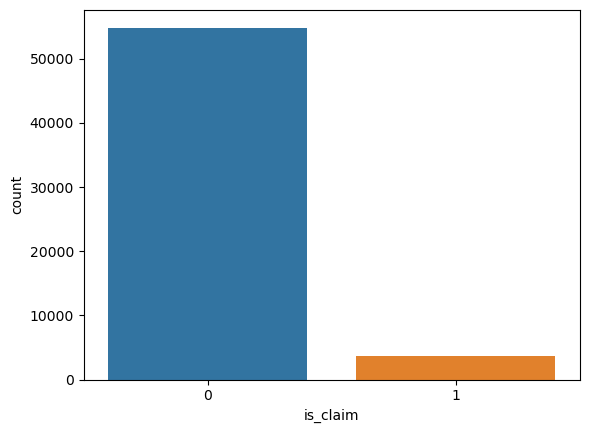

In [24]:
sns.countplot(train['is_claim'])

In [25]:
'''# the above shows the dataset is imbalanced
# Balancing dataset using upsampling technique

train_majority = train[(train['is_claim']==0)] 
train_minority = train[(train['is_claim']==1)] 

from sklearn.utils import resample
# upsampling minority class
upsampled_train_minority= resample(train_minority, 
                                 replace=True,    
                                 n_samples=54840,
                                 random_state=0)
# Combine majority class with upsampled minority class
balanced_train= pd.concat([upsampled_train_minority, train_majority])
balanced_train['is_claim'].value_counts()'''

"# the above shows the dataset is imbalanced\n# Balancing dataset using upsampling technique\n\ntrain_majority = train[(train['is_claim']==0)] \ntrain_minority = train[(train['is_claim']==1)] \n\nfrom sklearn.utils import resample\n# upsampling minority class\nupsampled_train_minority= resample(train_minority, \n                                 replace=True,    \n                                 n_samples=54840,\n                                 random_state=0)\n# Combine majority class with upsampled minority class\nbalanced_train= pd.concat([upsampled_train_minority, train_majority])\nbalanced_train['is_claim'].value_counts()"

In [26]:
train_majority = train[(train['is_claim']==0)].sample(4000)
train_minority = train[(train['is_claim']==1)]

balanced_train = train_majority.append(train_minority)

import sklearn.utils
balanced_train = sklearn.utils.shuffle(balanced_train)

In [27]:
balanced_train=balanced_train.drop('policy_id',axis=1)
balanced_train.head()

policy_tenure  age_of_car  age_of_policyholder  area_cluster  \
19143       0.523102        0.11             0.490385            21   
8442        0.985174        0.14             0.355769            21   
25538       0.557666        0.05             0.461538             6   
39591       1.154630        0.05             0.298077            12   
52966       1.139211        0.02             0.490385            21   

       population_density  make  segment  model  fuel_type  max_torque  \
19143                8794     1        3      8          3    0.025682   
8442                 8794     3        5      6          2    0.090909   
25538                7788     1        3      8          3    0.025682   
39591               27003     3        5      6          2    0.090909   
52966                8794     1        3      8          3    0.025682   

       max_power  engine_type  airbags  is_esc  is_adjustable_steering  \
19143   0.014750            9        2       0                       1   
8442    0.028363            4        6       1                       1   
25538   0.014750            9        2       0                       1   
39591   0.028363            4        6       1                       1   
52966   0.014750            9        2       0                       1   

       is_tpms  is_parking_sensors  is_parking_camera  rear_brakes_type  \
19143        0                   1                  0                 1   
8442         1                   1                  1                 0   
25538        0                   1                  0                 1   
39591        1                   1                  1                 0   
52966        0                   1                  0                 1   

       displacement  cylinder  transmission_type  gear_box  steering_type  \
19143          1197         4                  1         5              1   
8442           1493         4                  0         6              3   
25538          1197         4                  1         5              1   
39591          1493         4                  0         6              3   
52966          1197         4                  1         5              1   

       turning_radius  length  width  height  gross_weight  \
19143             4.8    3845   1735    1530          1335   
8442              5.2    4300   1790    1635          1720   
25538             4.8    3845   1735    1530          1335   
39591             5.2    4300   1790    1635          1720   
52966             4.8    3845   1735    1530          1335   

       is_front_fog_lights  is_rear_window_wiper  is_rear_window_washer  \
19143                    1                     0                      0   
8442                     1                     1                      1   
25538                    1                     0                      0   
39591                    1                     1                      1   
52966                    1                     0                      0   

       is_rear_window_defogger  is_brake_assist  is_power_door_locks  \
19143                        0                1                    1   
8442                         1                1                    1   
25538                        0                1                    1   
39591                        1                1                    1   
52966                        0                1                    1   

       is_central_locking  is_power_steering  \
19143                   1                  1   
8442                    1                  1   
25538                   1                  1   
39591                   1                  1   
52966                   1                  1   

       is_driver_seat_height_adjustable  is_day_night_rear_view_mirror  \
19143                                 1                              1   
8442                                  1                              0   
25538   

# Feature Scaling

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(balanced_train.drop('is_claim',axis=1),balanced_train['is_claim'],test_size=0.33,random_state=0)

In [29]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

scaled_x_train=mms.fit_transform(x_train)
scaled_x_test=mms.transform(x_test)
                      
x_train=pd.DataFrame(scaled_x_train,columns=x_train.columns)
x_test=pd.DataFrame(scaled_x_test,columns=x_test.columns)
x_train.head()

policy_tenure  age_of_car  age_of_policyholder  area_cluster  \
0       0.736590    0.020408             0.194030      0.523810   
1       0.845571    0.040816             0.179104      0.809524   
2       0.117895    0.244898             0.014925      0.952381   
3       0.335834    0.183673             0.268657      1.000000   
4       0.383396    0.306122             0.417910      0.047619   

   population_density  make  segment  model  fuel_type  max_torque  max_power  \
0            0.365231   0.0      0.0    0.0        0.0    0.000000   0.000000   
1            0.470987   0.0      0.0    0.0        0.0    0.000000   0.000000   
2            0.116270   0.0      0.4    0.8        1.0    0.087901   0.370835   
3            0.239459   0.0      0.4    0.8        1.0    0.087901   0.370835   
4            1.000000   1.0      0.6    1.0        0.5    1.000000   0.945885   

   engine_type  airbags  is_esc  is_adjustable_steering  is_tpms  \
0          0.6      0.2     0.0                     0.0      0.0   
1          0.6      0.2     0.0                     0.0      0.0   
2          0.1      1.0     1.0                     1.0      0.0   
3          0.1      1.0     1.0                     1.0      0.0   
4          1.0      0.2     0.0                     1.0      0.0   

   is_parking_sensors  is_parking_camera  rear_brakes_type  displacement  \
0                 1.0                0.0               1.0      0.000000   
1                 1.0                0.0               1.0      0.000000   
2                 1.0                1.0               1.0      0.571225   
3                 1.0                1.0               1.0      0.571225   
4                 1.0                1.0               1.0      1.000000   

   cylinder  transmission_type  gear_box  steering_type  turning_radius  \
0       0.0                1.0       0.0            1.0        0.142857   
1       0.0                1.0       0.0            1.0        0.142857   
2       1.0                0.0       0.0            0.0        0.500000   
3       1.0                0.0       0.0            0.0        0.500000   
4       1.0                1.0       0.0            0.0        0.571429   

     length     width    height  gross_weight  is_front_fog_lights  \
0  0.000000  0.119048  0.000000      0.200299                  0.0   
1  0.000000  0.119048  0.000000      0.200299                  0.0   
2  0.637427  0.803571  0.071429      0.536622                  1.0   
3  0.637427  0.803571  0.071429      0.536622                  1.0   
4  0.643275  0.654762  0.074286      0.000000                  1.0   

   is_rear_window_wiper  is_rear_window_washer  is_rear_window_defogger  \
0                   0.0                    0.0                      0.0   
1                   0.0                    0.0                      0.0   
2                   1.0                    1.0                      1.0   
3                   1.0                    1.0                      1.0   
4                   0.0                    0.0                      1.0   

   is_brake_assist  is_power_door_locks  is_central_locking  \
0              0.0                  0.0                 0.0   
1              0.0                  0.0                 0.0   
2              1.0                  1.0                 1.0   
3              1.0                  1.0                 1.0   
4              0.0                  1.0                 1.0   

   is_power_steering  is_driver_seat_height_adjustable  \
0                1.0                               0.0   
1                1.0                               0.0   
2                1.0                               1.0   
3                1.0                               1.0   
4                1.0                               1.0   

   is_day_night_rear_view_mirror  is_ecw  is_speed_alert  ncap_rating  
0                            0.0     0.0             1.0          0.0  
1                            0.0     0.0            

In [30]:
y_train.value_counts()

0    2683
1    2508
Name: is_claim, dtype: int64

# Feature Selection

In [31]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

In [32]:
x_sel=SelectFromModel(Lasso(alpha=0.0001,random_state=0))
x_sel.fit(x_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.0001, random_state=0))

In [33]:
x_sel.get_support()

array([ True,  True,  True,  True,  True, False, False,  True, False,
       False, False, False, False,  True,  True, False,  True,  True,
       False, False, False, False,  True, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False,  True,  True, False, False, False])

In [34]:
x_selected=x_train.columns[x_sel.get_support()]
len(x_selected)


15

In [35]:
x_train_sel=x_train[x_selected]
x_test_sel=x_test[x_selected]
x_train_sel.head()

policy_tenure  age_of_car  age_of_policyholder  area_cluster  \
0       0.736590    0.020408             0.194030      0.523810   
1       0.845571    0.040816             0.179104      0.809524   
2       0.117895    0.244898             0.014925      0.952381   
3       0.335834    0.183673             0.268657      1.000000   
4       0.383396    0.306122             0.417910      0.047619   

   population_density  model  is_esc  is_adjustable_steering  \
0            0.365231    0.0     0.0                     0.0   
1            0.470987    0.0     0.0                     0.0   
2            0.116270    0.8     1.0                     1.0   
3            0.239459    0.8     1.0                     1.0   
4            1.000000    1.0     0.0                     1.0   

   is_parking_sensors  is_parking_camera  gear_box    height  \
0                 1.0                0.0       0.0  0.000000   
1                 1.0                0.0       0.0  0.000000   
2                 1.0                1.0       0.0  0.071429   
3                 1.0                1.0       0.0  0.071429   
4                 1.0                1.0       0.0  0.074286   

   is_rear_window_wiper  is_driver_seat_height_adjustable  \
0                   0.0                               0.0   
1                   0.0                               0.0   
2                   1.0                               1.0   
3                   1.0                               1.0   
4                   0.0                               1.0   

   is_day_night_rear_view_mirror  
0                            0.0  
1                            0.0  
2                            1.0  
3                            1.0  
4                            1.0

In [36]:
x_test_sel.head()

policy_tenure  age_of_car  age_of_policyholder  area_cluster  \
0       0.184443    0.244898             0.432836      0.952381   
1       0.952550    0.122449             0.298507      0.952381   
2       0.221021    0.204082             0.089552      0.952381   
3       0.586262    0.122449             0.223881      0.523810   
4       0.160072    0.040816             0.059701      0.714286   

   population_density  model  is_esc  is_adjustable_steering  \
0            0.116270    1.0     0.0                     1.0   
1            0.116270    0.5     1.0                     1.0   
2            0.116270    0.5     1.0                     1.0   
3            0.365231    0.0     0.0                     0.0   
4            0.051764    0.0     0.0                     0.0   

   is_parking_sensors  is_parking_camera  gear_box    height  \
0                 1.0                1.0       0.0  0.074286   
1                 1.0                1.0       1.0  0.457143   
2                 1.0                1.0       1.0  0.457143   
3                 1.0                0.0       0.0  0.000000   
4                 1.0                0.0       0.0  0.000000   

   is_rear_window_wiper  is_driver_seat_height_adjustable  \
0                   0.0                               1.0   
1                   1.0                               1.0   
2                   1.0                               1.0   
3                   0.0                               0.0   
4                   0.0                               0.0   

   is_day_night_rear_view_mirror  
0                            1.0  
1                            0.0  
2                            0.0  
3                            0.0  
4                            0.0

In [37]:
#XGBoost Classifier

import xgboost
from xgboost import XGBClassifier
xgb=XGBClassifier(random_state=1)
xgb.fit(x_train_sel, y_train)

C:\Users\Jane Ijeoma\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:18:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score,confusion_matrix


In [39]:
# f1_score xgboost
xgb_pred=xgb.predict(x_test_sel)
xgb_f1=f1_score(y_true=y_test,y_pred=xgb_pred)
round(xgb_f1,4)

0.5616

In [40]:
#lightGBM

from lightgbm import LGBMClassifier
lgc=LGBMClassifier(random_state=1)
lgc.fit(x_train_sel, y_train)

LGBMClassifier(random_state=1)

In [41]:
# f1_score lgbm
lgc_pred=lgc.predict(x_test_sel)
lgc_f1=f1_score(y_true=y_test,y_pred=lgc_pred)
round(lgc_f1,4)

0.5765

In [42]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=1)
rfc.fit(x_train_sel,y_train)

RandomForestClassifier(random_state=1)

In [43]:
# accuracy random forest

rfc_pred=rfc.predict(x_test_sel)
rfc_f1=f1_score(y_true=y_test,y_pred=rfc_pred)
round(rfc_f1,4)

0.5523

In [44]:
#ExtraTreesClassifier

from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(random_state=1)
etc.fit(x_train_sel, y_train)

ExtraTreesClassifier(random_state=1)

In [45]:
# f1 score ExtraTreesClassifier

etc_pred=etc.predict(x_test_sel)
etc_f1=f1_score(y_true=y_test,y_pred=etc_pred)
round(etc_f1,4)

0.5417

In [46]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression() 
log_reg.fit(x_train_sel, y_train)

LogisticRegression()

In [47]:
#f1 score Logistic Regression

log_reg_pred=log_reg.predict(x_test_sel)
log_reg_f1=f1_score(y_true=y_test,y_pred=log_reg_pred)
round(log_reg_f1,4)

0.5518

In [48]:
# support vector

from sklearn.svm import SVC
svc= SVC()
svc.fit(x_train_sel, y_train)

SVC()

In [49]:
#f1 score svm

svc_pred=svc.predict(x_test_sel)
svc_f1=f1_score(y_true=y_test,y_pred=svc_pred)
round(svc_f1,4)

0.5622

In [50]:
# knn

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train_sel, y_train)

KNeighborsClassifier(n_neighbors=2)

In [51]:
# f1 score knn

knn_pred=knn.predict(x_test_sel)
knn_f1=f1_score(y_true=y_test,y_pred=knn_pred)
round(knn_f1,4)

0.3493

In [52]:
# naive bayes

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train_sel, y_train)

GaussianNB()

In [53]:
# f1 score naive bayes

gnb_pred=gnb.predict(x_test_sel)
gnb_f1=f1_score(y_true=y_test,y_pred=gnb_pred)
round(gnb_f1,4)

0.5867

In [54]:
'''import pickle
with open('etc_pkl','wb') as files:
    pickle.dump(etc, files)'''

"import pickle\nwith open('etc_pkl','wb') as files:\n    pickle.dump(etc, files)"

In [55]:
print(x_selected)

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density', 'model', 'is_esc', 'is_adjustable_steering',
       'is_parking_sensors', 'is_parking_camera', 'gear_box', 'height',
       'is_rear_window_wiper', 'is_driver_seat_height_adjustable',
       'is_day_night_rear_view_mirror'],
      dtype='object')


# Redoing Feature Selection with Extra Tree Classifier

In [56]:
etc = ExtraTreesClassifier(random_state=1)
etc.fit(x_train, y_train)

importance=etc.feature_importances_

In [57]:
importance=pd.DataFrame(importance)
importance['features']=x_train.columns
importance

0                          features
0   0.337437                     policy_tenure
1   0.233599                        age_of_car
2   0.260383               age_of_policyholder
3   0.079177                      area_cluster
4   0.078664                population_density
5   0.000262                              make
6   0.000368                           segment
7   0.000474                             model
8   0.000327                         fuel_type
9   0.000409                        max_torque
10  0.000369                         max_power
11  0.000398                       engine_type
12  0.000143                           airbags
13  0.000231                            is_esc
14  0.000444            is_adjustable_steering
15  0.000082                           is_tpms
16  0.000195                is_parking_sensors
17  0.000274                 is_parking_camera
18  0.000096                  rear_brakes_type
19  0.000379                      displacement
20  0.000184                          cylinder
21  0.000234                 transmission_type
22  0.000093                          gear_box
23  0.000319                     steering_type
24  0.000458                    turning_radius
25  0.000503                            length
26  0.000486                             width
27  0.000589                            height
28  0.000398                      gross_weight
29  0.000233               is_front_fog_lights
30  0.000129              is_rear_window_wiper
31  0.000151             is_rear_window_washer
32  0.000218           is_rear_window_defogger
33  0.000296                   is_brake_assist
34  0.000428               is_power_door_locks
35  0.000265                is_central_locking
36  0.000098                 is_power_steering
37  0.000211  is_driver_seat_height_adjustable
38  0.000228     is_day_night_rear_view_mirror
39  0.000241                            is_ecw
40  0.000082                    is_speed_alert
41  0.000445                       ncap_rating

In [58]:
importance.rename(columns={0:'Importance'},inplace=True)
selected=importance.sort_values(by='Importance',ascending=False).head(15).reset_index()
selected

index  Importance                features
0       0    0.337437           policy_tenure
1       2    0.260383     age_of_policyholder
2       1    0.233599              age_of_car
3       3    0.079177            area_cluster
4       4    0.078664      population_density
5      27    0.000589                  height
6      25    0.000503                  length
7      26    0.000486                   width
8       7    0.000474                   model
9      24    0.000458          turning_radius
10     41    0.000445             ncap_rating
11     14    0.000444  is_adjustable_steering
12     34    0.000428     is_power_door_locks
13      9    0.000409              max_torque
14     11    0.000398             engine_type

In [59]:
#assigning only the chosen important features to x_train and y_train

x_trained=x_train[selected['features']]
x_tested=x_test[selected['features']]

In [60]:
xgb=XGBClassifier(random_state=1)
xgb.fit(x_trained, y_train)

# f1_score xgboost
xgb_pred=xgb.predict(x_tested)
xgb_f1=f1_score(y_true=y_test,y_pred=xgb_pred)
round(xgb_f1,4)

C:\Users\Jane Ijeoma\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:18:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.5679

In [61]:
lgc=LGBMClassifier(random_state=1)
lgc.fit(x_trained, y_train)

lgc_pred=lgc.predict(x_tested)
lgc_f1=f1_score(y_true=y_test,y_pred=lgc_pred)
round(lgc_f1,4)

0.5817

In [62]:
rfc = RandomForestClassifier(random_state=1)
rfc.fit(x_trained,y_train)

rfc_pred=rfc.predict(x_tested)
rfc_f1=f1_score(y_true=y_test,y_pred=rfc_pred)
round(rfc_f1,4)

0.5531

In [63]:
etc = ExtraTreesClassifier(random_state=1)
etc.fit(x_trained, y_train)

# f1 score ExtraTreesClassifier
etc_pred=etc.predict(x_tested)
etc_f1=f1_score(y_true=y_test,y_pred=etc_pred)
round(etc_f1,4)

0.5378

In [64]:
log_reg = LogisticRegression() 
log_reg.fit(x_trained, y_train)

#f1 score Logistic Regression

log_reg_pred=log_reg.predict(x_tested)
log_reg_f1=f1_score(y_true=y_test,y_pred=log_reg_pred)
round(log_reg_f1,4)

0.5503

In [65]:
'''Note that from the two feature selections carried out above, light gbm has the highest f1 score and has its highest value 
in the lasso feature selection
therefore we will be sure to tune it with other models and parameters to get optimal f1 score'''

'Note that from the two feature selections carried out above, light gbm has the highest f1 score and has its highest value \nin the lasso feature selection\ntherefore we will be sure to tune it with other models and parameters to get optimal f1 score'

# Parameter Tuning 

In [66]:
from sklearn.model_selection import GridSearchCV
model_param={'log_reg':{'model':log_reg,'params':{'penalty' : ['l1', 'l2', 'elasticnet', 'none'],'C':[0.001,0.01,0.5,0,1,1.0,5.0],'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}},
            'etc':{'model':etc,'params':{'n_estimators':[50,80,100,150,200],'criterion' : ["gini", "entropy", "log_loss"],'max_features' :["sqrt", "log2", None]}}, 
            'rfc':{'model':rfc,'params':{'n_estimators' :[80,100,150,200],'criterion' : ["gini", "entropy", "log_loss"],'max_features' : ["sqrt", "log2", None]}},
            'lgc':{'model':lgc,'params':{'boosting_type':['gbdt','dart','goss','rf'],'num_leaves' :[10,15,20,25,31,50],'n_estimators':[20,50,60,70,100], 'importance_type':['split','gains']}}
            }

In [67]:
result=[]
for model_name, i in model_param.items():
    gs=GridSearchCV(i['model'],i['params'],cv=5,return_train_score=False,scoring='f1')
    gs.fit(x_train_sel,y_train)
    result.append({'model':model_name,'best score':gs.best_score_,'best parameter':gs.best_params_})

C:\Users\Jane Ijeoma\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Jane Ijeoma\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Jane Ijeoma\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Jane Ijeoma\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Jane Ijeoma\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warni

C:\Users\Jane Ijeoma\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Jane Ijeoma\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Jane Ijeoma\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Jane Ijeoma\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Jane Ijeoma\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warni

C:\Users\Jane Ijeoma\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Jane Ijeoma\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Jane Ijeoma\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Jane Ijeoma\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Jane Ijeoma\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warni

C:\Users\Jane Ijeoma\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
300 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Jane Ijeoma\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Jane Ijeoma\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 890, in fit
    super().fit(X, _y, sample_weight=sample_weight, init_score=init_score, eval_set=valid_sets,
  File "C:\Users\Jane Ijeoma\anaconda3\lib\site-packages\lightgbm\

In [68]:
result

[{'model': 'log_reg',
  'best score': 0.5455846316549074,
  'best parameter': {'C': 5.0, 'penalty': 'l1', 'solver': 'liblinear'}},
 {'model': 'etc',
  'best score': 0.548130469531749,
  'best parameter': {'criterion': 'gini',
   'max_features': None,
   'n_estimators': 150}},
 {'model': 'rfc',
  'best score': 0.5666354878605833,
  'best parameter': {'criterion': 'entropy',
   'max_features': None,
   'n_estimators': 80}},
 {'model': 'lgc',
  'best score': 0.636070114851902,
  'best parameter': {'boosting_type': 'dart',
   'importance_type': 'split',
   'n_estimators': 50,
   'num_leaves': 10}}]

In [69]:
dr=pd.DataFrame(result)
dr

model  best score                                     best parameter
0  log_reg    0.545585  {'C': 5.0, 'penalty': 'l1', 'solver': 'libline...
1      etc    0.548130  {'criterion': 'gini', 'max_features': None, 'n...
2      rfc    0.566635  {'criterion': 'entropy', 'max_features': None,...
3      lgc    0.636070  {'boosting_type': 'dart', 'importance_type': '...

In [70]:
dr['best score'].max()

0.636070114851902

In [71]:
best_model=dr[dr['best score']==dr['best score'].max()]
best_model['best parameter']

3    {'boosting_type': 'dart', 'importance_type': '...
Name: best parameter, dtype: object

In [72]:
# Building model with the best parameters and model to test on test data

In [73]:
#lightGBM


lgc_best=LGBMClassifier(random_state=1, boosting_type= 'dart',
   importance_type=  'split',
   n_estimators=  20,
   num_leaves=  10)
lgc_best.fit(x_train_sel, y_train)
lgc_best_pred=lgc_best.predict(x_test_sel)
lgc_best_f1=f1_score(y_true=y_test,y_pred=lgc_best_pred)
round(lgc_best_f1,4)

0.6165

In [91]:
test=pd.read_csv('C:/pypy/test_zo1G9sv.csv')
test.head()

nan_cols= [col for col in test.columns if test[col].isnull().sum()>1]
print(len(nan_cols))
nan_cols

numerical_cols=[col for col in test.columns if test[col].dtypes !='O']
print('Number of numerical features=', len(numerical_cols))

categorical_col=[col for col in test.columns if col not in numerical_cols]
for col in categorical_col:
    print('The feature name is {} and the number of categories are {}'.format(col,len(test[col].unique())))

for feature in categorical_col:
    if len(test[feature].unique())==2:
        test[feature]=pd.get_dummies(test[feature],drop_first=True)
        

# for Max_torque feature find the value in Nm/rpm
test['max_torque(Nm)']=test['max_torque'].apply(lambda x:x.split('N')[0]).astype('float')
test['max_torque(@)']=test['max_torque'].apply(lambda x:x.split('@')[1])
test['max_torque(rpm)']=test['max_torque(@)'].apply(lambda x:x.split('r')[0]).astype('float')
test['max_torque']=test['max_torque(Nm)']/test['max_torque(rpm)']


# for Max_power feature find the value in bhp/rpm
test['max_power(bhp)']=test['max_power'].apply(lambda x:x.split('b')[0]).astype('float')
test['max_power(@)']=test['max_power'].apply(lambda x:x.split('@')[1])
test['max_power(rpm)']=test['max_power(@)'].apply(lambda x:x.split('r')[0]).astype('float')
test['max_power']=test['max_power(bhp)']/test['max_power(rpm)']

test.drop(['max_torque(Nm)','max_torque(@)','max_torque(rpm)','max_power(bhp)','max_power(@)','max_power(rpm)'],axis=1,inplace=True)
test.head()

object_feature=[x for x in test.columns if test[x].dtypes=='O']
for col in object_feature:
    x=np.sort(test[col].unique())
    dict1={k:v for v, k in enumerate(x,1)}
    test[col]=test[col].map(dict1)
    
    
uint8_feature=[x for x in test.columns if test[x].dtypes=='uint8']
for x in uint8_feature:
    test[x]=test[x].astype(int)
    
test.info()

0
Number of numerical features= 15
The feature name is policy_id and the number of categories are 39063
The feature name is area_cluster and the number of categories are 22
The feature name is segment and the number of categories are 6
The feature name is model and the number of categories are 11
The feature name is fuel_type and the number of categories are 3
The feature name is max_torque and the number of categories are 9
The feature name is max_power and the number of categories are 9
The feature name is engine_type and the number of categories are 11
The feature name is is_esc and the number of categories are 2
The feature name is is_adjustable_steering and the number of categories are 2
The feature name is is_tpms and the number of categories are 2
The feature name is is_parking_sensors and the number of categories are 2
The feature name is is_parking_camera and the number of categories are 2
The feature name is rear_brakes_type and the number of categories are 2
The feature name

In [101]:
test_sel=test[x_selected]


In [102]:
ans=gs.predict(test_sel)
answer=pd.DataFrame(ans,columns=['is_claim'])
solution=pd.concat([test['policy_id'],answer],axis=1).set_index('policy_id')

solution

is_claim
policy_id          
1                 0
2                 0
3                 0
4                 0
5                 0
...             ...
39059             0
39060             0
39061             0
39062             0
39063             0

[39063 rows x 1 columns]

In [99]:
answer['is_claim'].value_counts()

0    38850
1      213
Name: is_claim, dtype: int64

In [103]:
solution.to_csv('submission_dataverse.csv')

In [105]:
pd.pandas.set_option('display.max_rows', None)
solution

is_claim
policy_id          
1                 0
2                 0
3                 0
4                 0
5                 0
6                 0
7                 0
8                 0
9                 0
10                0
11                0
12                0
13                0
14                1
15                0
16                0
17                0
18                0
19                0
20                0
21                0
22                0
23                0
24                0
25                0
26                0
27                0
28                0
29                0
30                0
31                0
32                0
33                0
34                0
35                0
36                0
37                0
38                0
39                0
40                0
41                0
42                0
43                0
44                0
45                0
46                0
47                0
48                0
49                0
50                0
51                0
52                0
53                0
54                0
55                0
56                0
57                0
58                0
59                0
60                0
61                0
62                0
63                0
64                0
65                0
66                0
67                0
68                0
69                0
70                0
71                0
72                0
73                0
74                0
75                0
76                0
77                0
78                0
79                0
80                0
81                0
82                0
83                0
84                0
85                0
86                0
87                0
88                0
89                0
90                0
91                0
92                0
93                0
94                0
95                0
96                0
97                0
98                0
99                0
100               0
101               0
102               0
103               0
104               0
105               0
106               0
107               0
108               0
109               0
110               0
111               0
112               0
113               0
114               0
115               0
116               0
117               0
118               0
119               0
120               0
121               0
122               0
123               0
124               0
125               0
126               0
127               0
128               0
129               0
130               0
131               0
132               0
133               0
134               0
135               0
136               0
137               0
138               0
139               0
140               0
141               0
142               0
143               0
144               0
145               0
146               0
147               0
148               0
149               0
150               0
151               0
152               0
153               0
154               0
155               0
156               0
157               0
158               0
159               0
160               0
161               0
162               0
163               0
164               0
165               0
166               0
167               0
168               0
169               0
170               0
171               0
172               0
173               0
174               0
175               0
176               0
177               0
178               0
179               0
180               0
181               0
182               0
183               0
184               0
185               0
186               0
187               0
188               0
189               0
190               0
191               0
192               0
193               0
194               0
195               0
196               0
197               0
198               0
199        